# Problem statement

In [1]:
# This dataset is based on an evaluation form filled out by students for different courses. 
#It has different attributes including attendance, difficulty, score for each evaluation question, among others. 
#This is an unsupervised learning problem. 
#The dataset has 5820 rows and 33 columns.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv('/Users/asadimam/hibu/documents/python-scripts/clustering-problem/dataset.csv')

In [4]:
dataset

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# Exploratory data analysis

In [5]:
dataset.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


### To understand which course got the most response

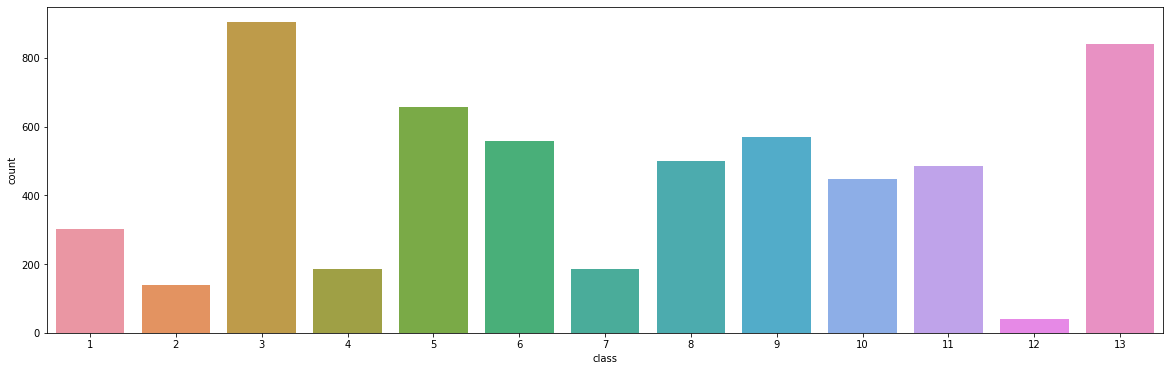

In [6]:
plt.figure(figsize=(20,6))
sns.countplot(x='class', data=dataset)

Looks like course 3 is the most popular course

### To understand how rating were given for each question

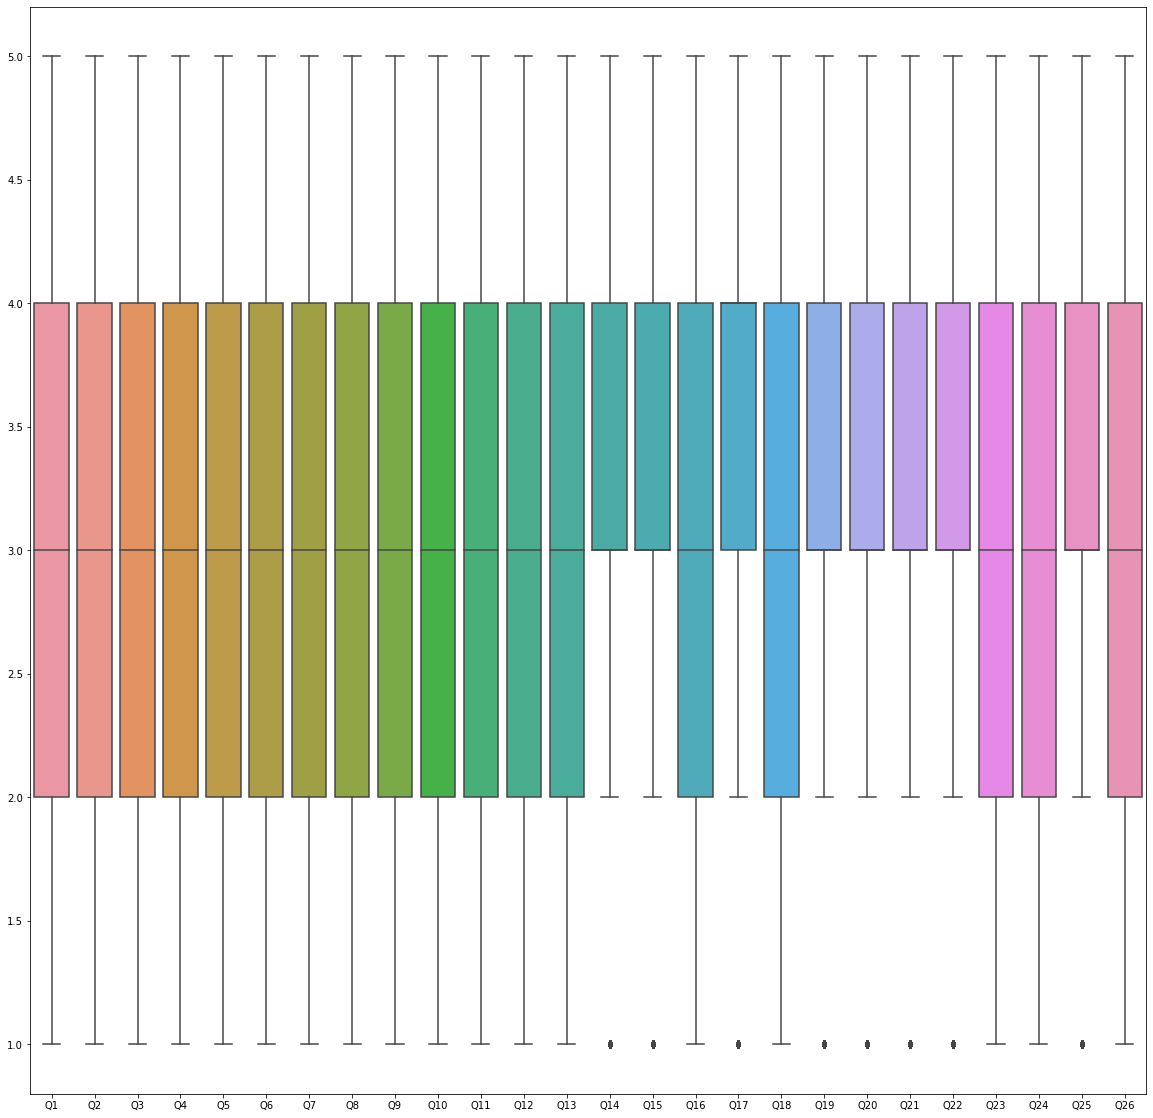

In [7]:
plt.figure(figsize=(20,20))
sns.boxplot(data=dataset.iloc[:,5:31])

Looking at the above graph it's clear that for questions 14,15,17,19,29,21,22 and 25 very few number of students gave a completely disagree as an answer. 

### Student response per question per class

In [8]:
## Calculate mean for each question response for all the classes
questionmeans = []
classlist = []
questions = []

totalplot = pd.DataFrame(list(zip(classlist,questions,questionmeans)), columns =['class','questions','questionmeans'])

for class_num in range(1,13):
    class_data = dataset[(dataset['class']==class_num)]
    
    questionmeans = []
    classlist = []
    questions = []
    
    for num in range(1,13):
        questions.append(num)
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist += 12 * [class_num]
    print(classlist)
    plotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans)), columns = ['class','questions','mean'])
    totalplot = totalplot.append(plotdata,ignore_index=True)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


/Users/asadimam/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [9]:
totalplot

,class,mean,questionmeans,questions
0,1,3.171617,NaN,1
1,1,3.363036,NaN,2
2,1,3.399340,NaN,3
3,1,3.330033,NaN,4
4,1,3.356436,NaN,5
...,...,...,...,...
139,12,2.829268,NaN,8
140,12,2.951220,NaN,9
141,12,2.731707,NaN,10
142,12,2.878049,NaN,11


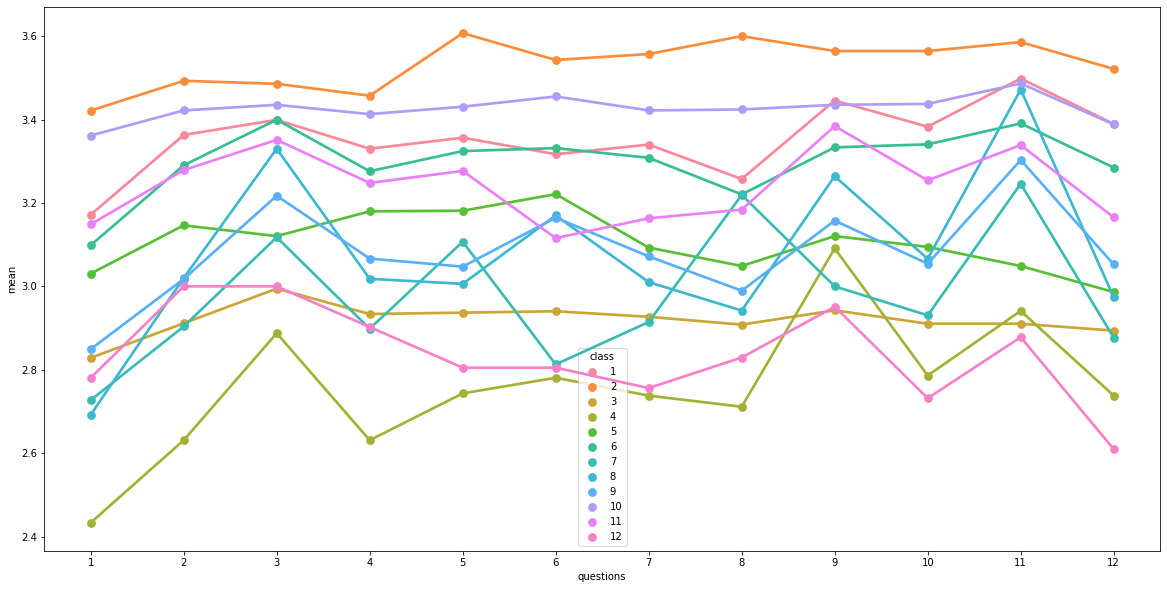

In [10]:
plt.figure(figsize=(20,10))
sns.pointplot(x="questions",y="mean",data=totalplot,hue = "class")

### Student response per instructor 

The instructure questions are from questions 13 onwards

In [11]:
questionmeans = []
inslist = []
questions = []

totalplotdata_ins = pd.DataFrame(list(zip(inslist,questions,questionmeans)),columns = ['ins','questions','mean'])

In [12]:
totalplotdata_ins

,ins,questions,mean


In [13]:
for ins_num in range(1,4):
    ins_data = dataset[(dataset["instr"]==ins_num)]
    questionmeans = []
    inslist = []
    questions = []
    
    for num in range(13,29):
        questions.append(num)
        
    for col in range(17,33):
        questionmeans.append(ins_data.iloc[:,col].mean())
        
    inslist += 16 *[ins_num]
    
    plotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans)),columns=["ins","questions","mean"])
    totalplotdata_ins = totalplotdata_ins.append(plotdata,ignore_index = True)

In [14]:
totalplotdata_ins

,ins,questions,mean
0,1,13,3.416774
1,1,14,3.456774
2,1,15,3.438710
3,1,16,3.369032
4,1,17,3.513548
5,1,18,3.449032
6,1,19,3.421935
7,1,20,3.393548
8,1,21,3.367742
9,1,22,3.387097


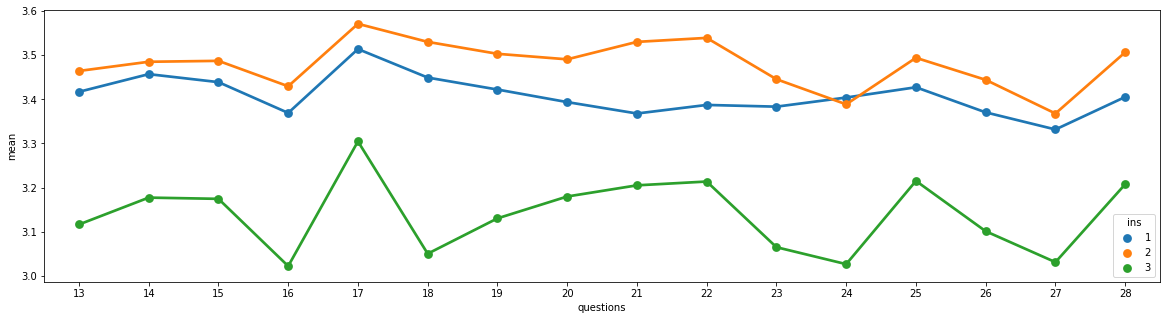

In [15]:
plt.figure(figsize=(20,5))
sns.pointplot(x='questions',y='mean', data=totalplotdata_ins,hue="ins")

Looks like instructer 1 and 2 are doing ok and were rated similarly by all students. However, instructor **3** is not doing as well, as per student rating. 

So now it would be interesting to know which class is the instructor 3 teaching and if he/she is consistently performing poorly in each class or a particular class.

In [16]:
dataset_ins3 = dataset[(dataset["instr"]==3)]
class_array_for_inst3 = dataset_ins3["class"].unique().tolist()
questionmeans = []
classlist = []
questions = []
totalplotdata_ins_class = pd.DataFrame(list(zip(classlist,questions,questionmeans)),columns=['class','questions','mean'])

for class_num in class_array_for_inst3:
    class_data = dataset_ins3[(dataset_ins3["class"]==class_num)]
    questionsmeans = []
    classlist = []
    questions = []
    
    for num in range(1,13):
        questions.append(num)
        
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist += 12*[class_num]
    
    plotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans)),columns = ['class','questions','mean'])
    
    totalplotdata_ins_class = totalplotdata_ins_class.append(plotdata,ignore_index=True)

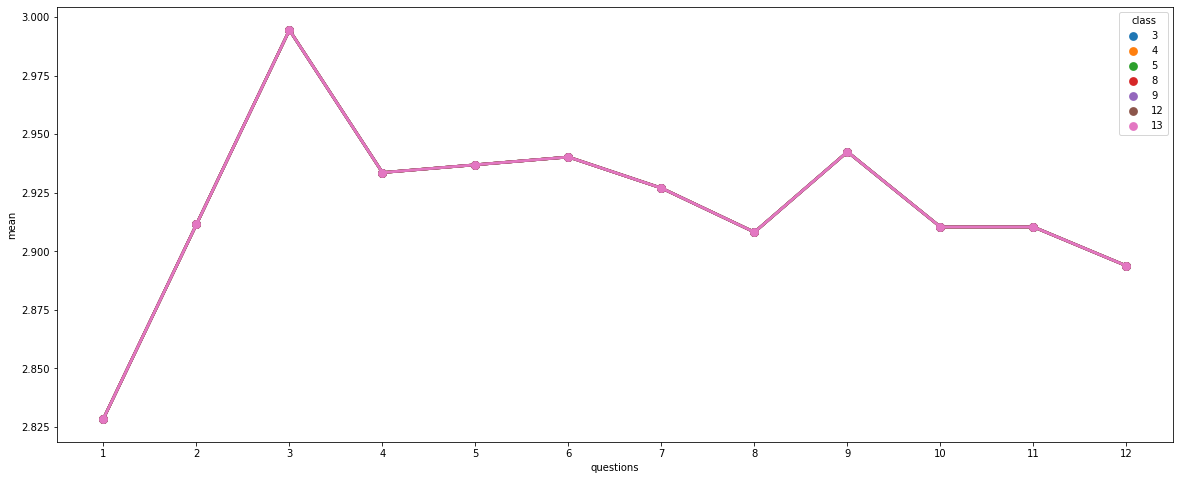

In [17]:
plt.figure(figsize=(20,8))
sns.pointplot(x='questions',y='mean', data=totalplotdata_ins_class, hue="class")

In [18]:
class_array_for_inst3

[3, 4, 5, 8, 9, 12, 13]

In [19]:
classlist

[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]

## Model building

We need to cluster all the students based on the question responses.

In [20]:
dataset_questions = dataset.iloc[:,5:33]

In [21]:
dataset_questions.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### Firstly, we will try to reduce dimensionality

There are two principal algorithms for dimensionality reduction: 
- **Linear Discriminant Analysis ( LDA )** and 
- **Principal Component Analysis ( PCA )**. 

The basic difference between these two is that LDA uses information of classes to find new features in order to maximize its separability while *PCA uses the variance of each feature* to do the same. In this context, *LDA can be consider a supervised algorithm and PCA an unsupervised algorithm.*

The idea behind PCA is simply to find a low-dimension set of axes that summarize data. Many of these features will measure related properties and so will be redundant. Therefore, we should remove these redundancy and describe each dataset with less properties. This is exactly what PCA aims to do.

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components = 2)
dataset_questions_pca = pca.fit_transform(dataset_questions)

In [24]:
dataset_questions_pca

array([[ 0.98901533,  0.52279815],
       [ 0.98901533,  0.52279815],
       [-9.59128851,  0.6408021 ],
       ...,
       [-9.59128851,  0.6408021 ],
       [11.56931918,  0.4047942 ],
       [11.56931918,  0.4047942 ]])

### Using the Elbow method to find the optimal number of clusters

In [25]:
from sklearn.cluster import KMeans

In [26]:
wcss = [] #within clusters sum of squares. It is the squared distances between data point

for i in range(1,7):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 42)
    kmeans.fit(dataset_questions_pca)
    wcss.append(kmeans.inertia_)
    

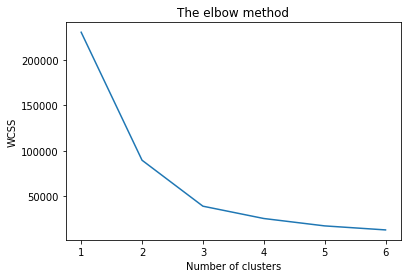

In [27]:
plt.plot(range(1,7),wcss)
plt.title("The elbow method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Based on the above graph we need to have a minimum of 3 clusters**

## Train and predict the model

In [30]:
kmeans = KMeans(n_clusters = 3, init= 'k-means++')
y_kmeans = kmeans.fit_predict(dataset_questions_pca)

In [31]:
print(y_kmeans)

[2 2 1 ... 1 0 0]


## Visualise the clusters

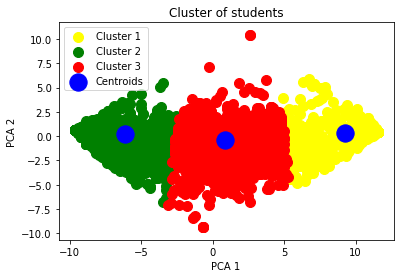

In [36]:
plt.scatter(dataset_questions_pca[y_kmeans==0,0],dataset_questions_pca[y_kmeans==0,1],c='yellow',s=100,label='Cluster 1')
plt.scatter(dataset_questions_pca[y_kmeans==1,0],dataset_questions_pca[y_kmeans==1,1],c='green',s=100,label='Cluster 2')
plt.scatter(dataset_questions_pca[y_kmeans==2,0],dataset_questions_pca[y_kmeans==2,1],c='red',s=100,label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue', label = 'Centroids')

plt.title('Cluster of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

### Count of students in each cluster

In [37]:
import collections
collections.Counter(y_kmeans)

Counter({2: 2358, 1: 2222, 0: 1240})

So we have 2358 students giving negative, 2222 givng positive ratings and 1240 as being neutral